# import packages

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# barplots of mean loss 

In [ ]:
mean_sum_bin_change_taxa_1

{'Mammals': [-0.12389533287379166, -0.09188231070483639],
 'Amphibians': [-inf, -0.10169846025451224],
 'Bird': [-0.11744116078862617, -0.07862983674048743]}

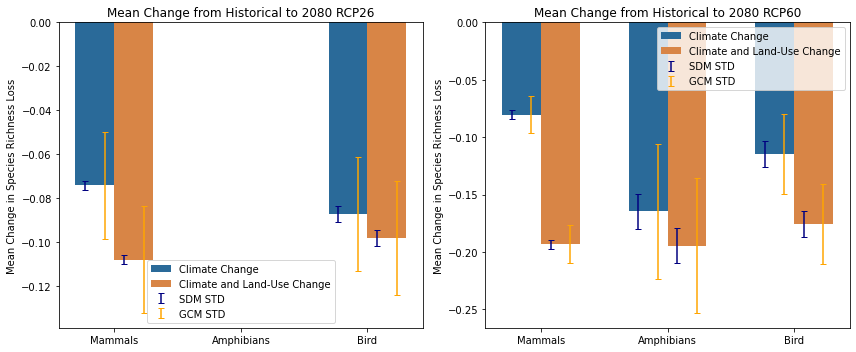

NameError: name 'scenarios' is not defined

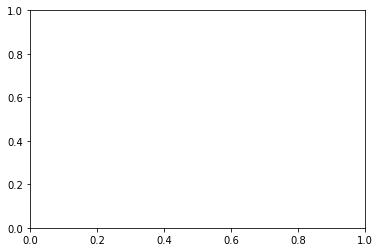

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"
taxas = ["Mammals", "Bird", "Amphibians"]
# Specify scenario and time for the first plot
scenario_1 = ["rcp26"]
time_1 = ['65']
time=65
scenario="rcp2.6"
# Read in the results from the saved pickle files
def load_pickle(file_name, scenario, time):
    file_path = os.path.join(output_dir, file_name.format(scenario=scenario, time=time))
    with open(file_path, "rb") as f:
        return pickle.load(f)

mean_values_1 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_1, time_1)
mean_sum_bin_change_taxa_1 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_sdm_taxa_1 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_gcm_taxa_1 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)

# Specify scenario and time for the second plot
scenario_2 = ["rcp60"]
time_2 = ['65']

# Read in the results from the saved pickle files for the second plot
mean_values_2 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_2, time_2)
mean_sum_bin_change_taxa_2 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_sdm_taxa_2 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_gcm_taxa_2 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)

# Set up the bar plots side by side
taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple

bar_width = 0.4
error_bar_shift = 0.1

x_positions_1 = np.arange(len(taxa_list)) * (2 * bar_width + 0.5)
x_positions_2 = x_positions_1 + len(taxa_list) * (2 * bar_width + 0.5)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first scenario
ax = axs[0]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_1[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM STD')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions_1 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
#ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP26')
ax.legend()

# Plot for the second scenario
ax = axs[1]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_2[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty,  label='GCM STD')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions_2 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
#ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP60')
ax.legend()

plt.tight_layout()
plt.show()# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for scenario in scenarios:
    mean_newvalue_change = {}
    mean_sum_bin_change = {}
    mean_land_use_change = {}

    for sdm in sdms:
        mean_newvalue_change[sdm] = {}
        mean_sum_bin_change[sdm] = {}
        mean_land_use_change[sdm] = {}

        for gcm in gcms:
            mean_newvalue_change[sdm][gcm] = {}
            mean_sum_bin_change[sdm][gcm] = {}
            mean_land_use_change[sdm][gcm] = {}

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_sum_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_sum_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_sum_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_sum_taxa = pickle.load(f)

                climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) 
                climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) 
                land_use_change = climate_land_change - climate_change

                climate_land_change_loss = climate_land_change.where(climate_land_change < 0)
                climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))

                # Store mean changes in dictionaries
                mean_newvalue_change[sdm][gcm][taxa] = climate_land_change_loss
                mean_sum_bin_change[sdm][gcm][taxa] = climate_change_loss
                mean_land_use_change[sdm][gcm][taxa] = land_use_change

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i] + bar_width if scenario == "rcp26" else x_positions[i]

        # Calculate the mean values over all SDMs and GCMs
        mean_climate_change = np.mean([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
        mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        # Calculate standard deviation or confidence interval for climate_change
        std_dev_climate_change = np.std([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        # Calculate standard deviation or confidence interval for land_use_change

        if not i:
            handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label=f'Climate Change')

plt.tight_layout()
plt.show()

#plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_loss.png")


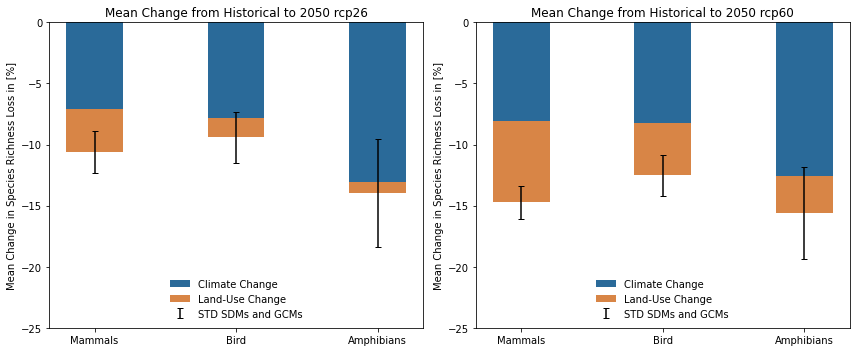

<Figure size 432x288 with 0 Axes>

In [12]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '35'
time_ind=35
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

# Load pickled data
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for scenario in scenarios:
    mean_newvalue_change[scenario] = {}
    mean_sum_bin_change[scenario] = {}
    mean_land_use_change[scenario] = {}

    for sdm in sdms:
        mean_newvalue_change[scenario][sdm] = {}
        mean_sum_bin_change[scenario][sdm] = {}
        mean_land_use_change[scenario][sdm] = {}

        for gcm in gcms:
            mean_newvalue_change[scenario][sdm][gcm] = {}
            mean_sum_bin_change[scenario][sdm][gcm] = {}
            mean_land_use_change[scenario][sdm][gcm] = {}

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_sum_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_sum_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_sum_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_sum_taxa = pickle.load(f)

                climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100
                climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100
                land_use_change = climate_land_change - climate_change

                climate_land_change_loss = climate_land_change.where(climate_land_change < 0)
                climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))
                
                                # Avoid division by zero
                non_zero_mask = newvalue_hist_sum_taxa != 0
                climate_change = xr.where(non_zero_mask, (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100, 0)

                non_zero_mask_sum_bin = sum_bin_hist_sum_taxa != 0
                climate_land_change = xr.where(non_zero_mask_sum_bin, (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100, 0)

                # Now handle NaN values or negative values as needed
                climate_land_change_loss = xr.where(climate_land_change < 0, climate_land_change, np.nan)
                climate_change_loss = xr.where((climate_land_change < 0) & (climate_change < 0), climate_change, np.nan)

                # Store mean changes in dictionaries
                mean_newvalue_change[scenario][sdm][gcm][taxa] = climate_land_change_loss
                mean_sum_bin_change[scenario][sdm][gcm][taxa] = climate_change_loss
                mean_land_use_change[scenario][sdm][gcm][taxa] = land_use_change

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for j, scenario in enumerate(scenarios):
    ax = axes[j]
    scenario_handles, scenario_labels = [], []  # Separate lists for each scenario

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]

        mean_climate_change = np.mean([np.mean(mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
        mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[scenario][sdm][gcm][taxa] - mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        std_dev_climate_change = np.std([np.mean(mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        if not i:
            handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
            handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
            handle_error = ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')

            # Extend the scenario-specific lists
            scenario_handles.extend([handle_climate_change, handle_land_use_change, handle_error])
            scenario_labels.extend(['Climate Change', 'Land-Use Change', 'STD SDMs and GCMs'])

        else:
            ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
            ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
            ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')

    # Extend the main lists with scenario-specific entries
    handles.extend(scenario_handles)
    labels.extend(scenario_labels)
#for ax in axes:
    ax.set_ylim(top=0, bottom=-25)
    ax.set_yticks(np.arange(0, -26, -5))
    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
    ax.legend(handles=scenario_handles, labels=scenario_labels, frameon=False, loc='lower center')
    ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

# Set the final legend outside the loop
#fig.legend(handles=handles, labels=labels, frameon=False, loc='lower center')

plt.tight_layout()
plt.show()
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time_ind]}_loss_rel.png")
    #

/scratch/local/2307139/ipykernel_92296/487802828.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(taxas)
/scratch/local/2307139/ipykernel_92296/487802828.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(taxas)


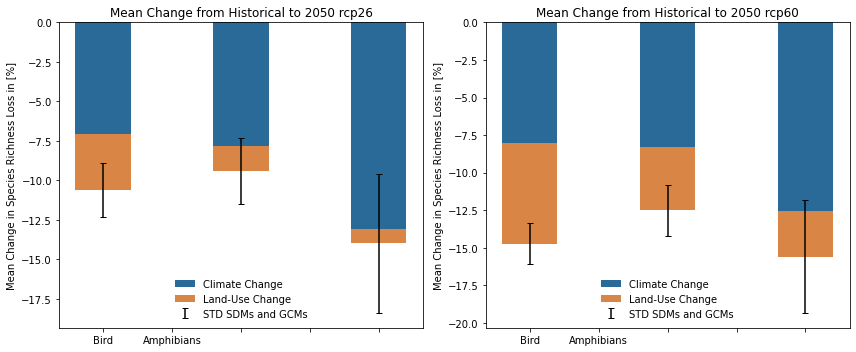

In [2]:
# relative  in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '35'
time_ind=35
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

# Load pickled data
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for scenario in scenarios:
    mean_newvalue_change[scenario] = {}
    mean_sum_bin_change[scenario] = {}
    mean_land_use_change[scenario] = {}

    for sdm in sdms:
        mean_newvalue_change[scenario][sdm] = {}
        mean_sum_bin_change[scenario][sdm] = {}
        mean_land_use_change[scenario][sdm] = {}

        for gcm in gcms:
            mean_newvalue_change[scenario][sdm][gcm] = {}
            mean_sum_bin_change[scenario][sdm][gcm] = {}
            mean_land_use_change[scenario][sdm][gcm] = {}

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_sum_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_sum_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_sum_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_sum_taxa = pickle.load(f)

                climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100
                climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100
                land_use_change = climate_land_change - climate_change

                climate_land_change_loss = climate_land_change.where(climate_land_change < 0)
                climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))
                

                # Store mean changes in dictionaries
                mean_newvalue_change[scenario][sdm][gcm][taxa] = climate_land_change_loss
                mean_sum_bin_change[scenario][sdm][gcm][taxa] = climate_change_loss
                mean_land_use_change[scenario][sdm][gcm][taxa] = land_use_change

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for j, scenario in enumerate(scenarios):
    ax = axes[j]
    scenario_handles, scenario_labels = [], []  # Separate lists for each scenario

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]

        mean_climate_change = np.mean([np.mean(mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
        mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[scenario][sdm][gcm][taxa] - mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        std_dev_climate_change = np.std([np.mean(mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        if not i:
            handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
            handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
            handle_error = ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')

            # Extend the scenario-specific lists
            scenario_handles.extend([handle_climate_change, handle_land_use_change, handle_error])
            scenario_labels.extend(['Climate Change', 'Land-Use Change', 'STD SDMs and GCMs'])

        else:
            ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
            ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
            ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')

    # Extend the main lists with scenario-specific entries
    handles.extend(scenario_handles)
    labels.extend(scenario_labels)
#for ax in axes:
    
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
    ax.legend(handles=scenario_handles, labels=scenario_labels, frameon=False, loc='lower center')
    ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

# Set the final legend outside the loop
#fig.legend(handles=handles, labels=labels, frameon=False, loc='lower center')

plt.tight_layout()
plt.show()

    #

/software.el7/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/software.el7/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:11

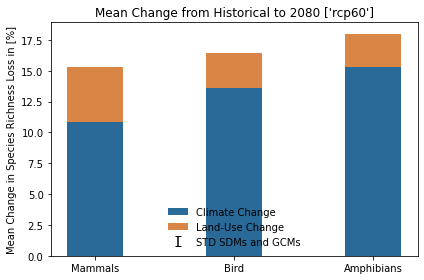

In [3]:
# relative gains in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenario=["rcp60"]
time=['65']
time_ind =65
# Load pickled data

mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            # Load pickle files
            newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")

            with open(newvalue_hist_sum_path, "rb") as f:
                newvalue_hist_sum_taxa = pickle.load(f)

            with open(newvalue_future_sum_path, "rb") as f:
                newvalue_future_sum_taxa = pickle.load(f)

            with open(sum_bin_hist_sum_path, "rb") as f:
                sum_bin_hist_sum_taxa = pickle.load(f)

            with open(sum_bin_future_sum_path, "rb") as f:
                sum_bin_future_sum_taxa = pickle.load(f)

            climate_change= (newvalue_future_sum_taxa - newvalue_hist_sum_taxa)
            climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) 
            land_use_change = climate_land_change - climate_change

            
                            #climate_change_loss = climate_change.where(climate_change < 0)
            climate_land_change_loss = climate_land_change.where(climate_land_change > 0)
            climate_change_loss = climate_change.where((climate_land_change > 0) & (climate_change > 0))
            

            climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100
            climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100
            land_use_change = climate_land_change - climate_change


            # Filter for gains
            threshold =0# Adjust the threshold based on your data characteristics

            climate_land_change_gains = climate_land_change.where(climate_land_change > threshold, drop=True)
            climate_change_gains = climate_change.where((climate_land_change >threshold) & (climate_change > threshold))


            # Store mean changes in dictionaries
            mean_newvalue_change[sdm][gcm][taxa] = climate_change_gains
            mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change_gains
            mean_land_use_change[sdm][gcm][taxa] = land_use_change
            
# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    mean_climate_change = np.nanmean(mean_newvalue_change[sdm][gcm][taxa])

    # Calculate the mean values over all combinations of SDMs and GCMs for climate_land_change_gains and climate_change
    mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa])])


    # Calculate standard deviation or confidence interval for climate_change
    std_dev_climate_change = np.std([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for land_use_change
  

    if not i:
        handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
        handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
        handle_error= ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')
       

    else:
        ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
        ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
        ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')
      

# Combine handles and labels for legend
handles.extend([handle_climate_change, handle_land_use_change, handle_error])
labels.extend(['Climate Change', 'Land-Use Change', 'STD SDMs and GCMs'])

# Set plot detailsax.set_ylim(bottom=0, top=np.max(mean_climate_change) + 2 * std_dev_climate_change)
ax.set_xticks(x_positions)
ax.set_xticklabels(taxas)

ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
ax.legend(handles=handles, labels=labels, frameon=False, loc= 'lower center')
  # Assuming '65' is the desired time value

ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

plt.tight_layout()
plt.show()



AttributeError: 'dict' object has no attribute 'plot'

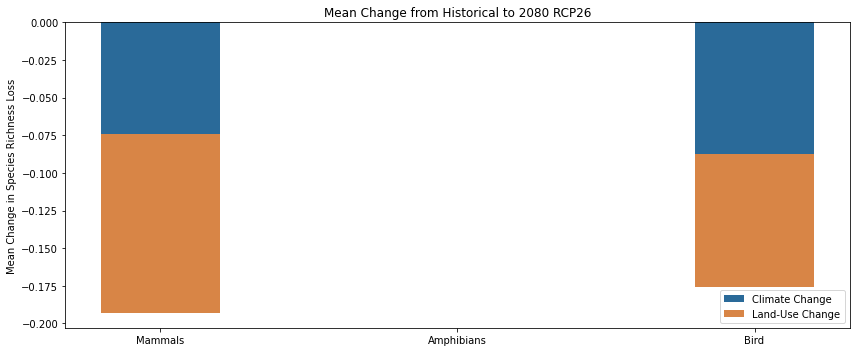

In [38]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"
taxa_list = ["Mammals", "Amphibians", "Bird"]
taxas =taxa_list
# Specify scenario and time for the first plot
scenario_1 = ["rcp60"]
time_1 = ['65']
time=65
scenario=["rcp26"]
# Read in the results from the saved pickle files
def load_pickle(file_name, scenario, time):
    file_path = os.path.join(output_dir, file_name.format(scenario=scenario, time=time))
    with open(file_path, "rb") as f:
        return pickle.load(f)

mean_value = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_1, time_1) 
mean_sum_bin_change_taxa = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_1, time_1) 
uncertainties_sdm_taxa_1 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_gcm_taxa_1 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)


# Specify scenario and time for the second plot
scenario_2 = ["rcp60"]
time_2 = ['65']

# Read in the results from the saved pickle files for the second plot
mean_values_2 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_2, time_2)
mean_sum_bin_change_taxa_2 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_sdm_taxa_2 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_gcm_taxa_2 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)

# ... (previous code)

# Calculate the difference between mean_sum_bin_change_taxa and mean_values
diff_mean_values = {}
diff_mean_sum_bin_change_taxa = {}



for i,taxa in enumerate(taxas):
    diff_mean_values[taxa] = [mean_sum_bin_change_taxa[taxa][i] - mean_values[taxa][i] for i in range(len(mean_values[taxa]))] 
    diff_mean_sum_bin_change_taxa[taxa] = mean_sum_bin_change_taxa[taxa] 

# Set up the bar plots
taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxa_list))

fig, axs = plt.subplots(figsize=(12, 5))

# Plot for the scenario
ax = axs
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift, np.mean(diff_mean_values[taxa]), width=bar_width, color=color_land_use_change, bottom=np.mean(mean_values[taxa]), label='Land-Use Change')

    else:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift, np.mean(diff_mean_values[taxa]), width=bar_width, color=color_land_use_change, bottom=np.mean(mean_values[taxa]))


ax.set_xticks(x_positions)
ax.set_xticklabels(taxa_list)
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP26')
ax.legend()

plt.tight_layout()
plt.show()

#plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_loss.png")

# ... (previous code)


In [53]:

# Calculate the difference between mean_sum_bin_change_taxa and mean_values
diff_mean_values = {}
diff_mean_sum_bin_change_taxa = {}

scenario = ["rcp26"]
time = ['65']

for taxa in taxas:
    diff_mean_values[taxa] = [mean_sum_bin_change_taxa[taxa][i] - mean_values[taxa][i] for i in range(len(mean_values[taxa]))]
    diff_mean_sum_bin_change_taxa[taxa] = mean_sum_bin_change_taxa[taxa]

# Set up the bar plots
taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxa_list))

fig, axs = plt.subplots(figsize=(12, 5))

# Plot for the scenario
ax = axs
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift, np.mean(diff_mean_values[taxa]), width=bar_width, color=color_land_use_change, bottom=np.mean(mean_values[taxa]), label='Land-Use Change')
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM STD')
        ax.errorbar(x_shift - error_bar_shift, np.mean(diff_mean_values[taxa] + mean_values[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(diff_mean_values[taxa] + mean_values[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift, np.mean(diff_mean_values[taxa]), width=bar_width, color=color_land_use_change, bottom=np.mean(mean_values[taxa]))
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift - error_bar_shift, np.mean(diff_mean_values[taxa] + mean_values[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(diff_mean_values[taxa] + mean_values[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

ax.set_xticks(x_positions)
ax.set_xticklabels(taxa_list)
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP26')
ax.legend()

plt.tight_layout()
plt.show()

NameError: name 'mean_values' is not defined

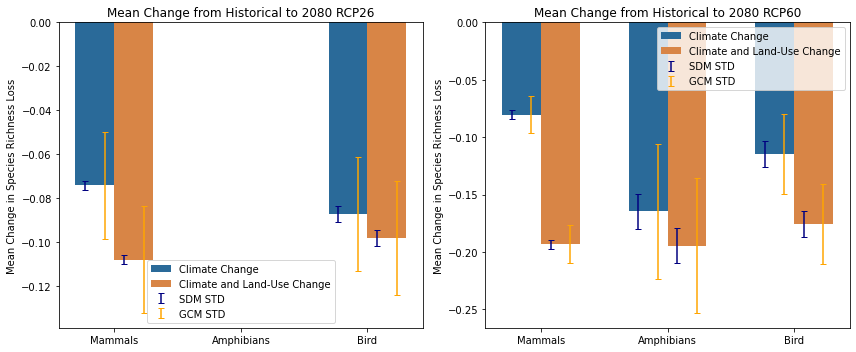

<Figure size 432x288 with 0 Axes>

In [69]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# Specify scenario and time for the first plot
scenario_1 = ["rcp26"]
time_1 = ['65']
time=65
scenario="rcp2.6"
# Read in the results from the saved pickle files
def load_pickle(file_name, scenario, time):
    file_path = os.path.join(output_dir, file_name.format(scenario=scenario, time=time))
    with open(file_path, "rb") as f:
        return pickle.load(f)

mean_values_1 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_1, time_1)
mean_sum_bin_change_taxa_1 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_sdm_taxa_1 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_gcm_taxa_1 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)

# Specify scenario and time for the second plot
scenario_2 = ["rcp60"]
time_2 = ['65']

# Read in the results from the saved pickle files for the second plot
mean_values_2 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_2, time_2)
mean_sum_bin_change_taxa_2 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_sdm_taxa_2 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_gcm_taxa_2 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)

# Set up the bar plots side by side
taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple

bar_width = 0.4
error_bar_shift = 0.1

x_positions_1 = np.arange(len(taxa_list)) * (2 * bar_width + 0.5)
x_positions_2 = x_positions_1 + len(taxa_list) * (2 * bar_width + 0.5)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first scenario
ax = axs[0]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_1[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM STD')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions_1 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
#ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP26')
ax.legend()

# Plot for the second scenario
ax = axs[1]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_2[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty,  label='GCM STD')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions_2 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
#ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP60')
ax.legend()

plt.tight_layout()
plt.show()
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_loss.png")


# barplots gain

NameError: name 'uncertainties_sdm_taxa' is not defined

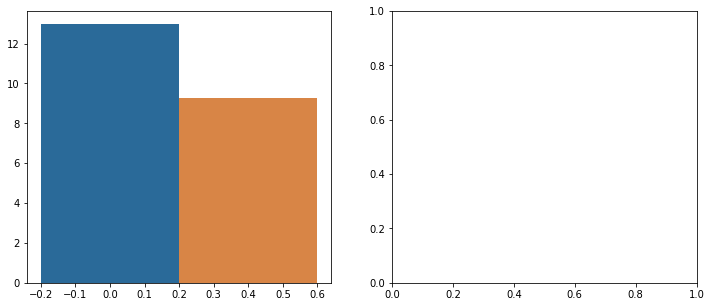

In [70]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# Specify scenario and time for the first plot
scenario_1 = ["rcp60"]
time_1 = ['65']

# Read in the results from the saved pickle files
def load_pickle(file_name, scenario, time):
    file_path = os.path.join(output_dir, file_name.format(scenario=scenario, time=time))
    with open(file_path, "rb") as f:
        return pickle.load(f)

mean_values_1 = load_pickle("mean_values_{scenario}_{time}_gain.pkl", scenario_1, time_1)
mean_sum_bin_change_taxa_1 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}_gain.pkl", scenario_1, time_1)
uncertainties_sdm_taxa_1 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}_gain.pkl", scenario_1, time_1)
uncertainties_gcm_taxa_1 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}_gain.pkl", scenario_1, time_1)

# Specify scenario and time for the second plot
scenario_2 = ["rcp60"]
time_2 = ['65']

# Read in the results from the saved pickle files for the second plot
mean_values_2 = load_pickle("mean_values_{scenario}_{time}_gain.pkl", scenario_2, time_2)
mean_sum_bin_change_taxa_2 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}_gain.pkl", scenario_2, time_2)
uncertainties_sdm_taxa_2 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}_gain.pkl", scenario_2, time_2)
uncertainties_gcm_taxa_2 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}_gain.pkl", scenario_2, time_2)

# Set up the bar plots side by side
taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple

bar_width = 0.4
error_bar_shift = 0.1

x_positions_1 = np.arange(len(taxa_list)) * (2 * bar_width + 0.5)
x_positions_2 = x_positions_1 + len(taxa_list) * (2 * bar_width + 0.5)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first scenario
ax = axs[0]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_1[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        
ax.set_yticks([45, 40, 35, 30, 25, 20, 15, 10, 5, 0])
ax.set_yticklabels(['45', '40', '35', '30', '25', '20', '15', '10', '5', '0'])
ax.set_xticks(x_positions_1 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Gain')
ax.set_title(f'Mean Change from Historical to 2080 RCP26')
ax.legend()

# Plot for the second scenario
ax = axs[1]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_2[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
ax.set_yticks([45, 40, 35, 30, 25, 20, 15, 10, 5, 0])
ax.set_yticklabels(['45', '40', '35', '30', '25', '20', '15', '10', '5', '0'])
ax.set_xticks(x_positions_2 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Gain')
ax.set_title(f'Mean Change from Historical to 2080 RCP60')
ax.legend()

plt.tight_layout()
plt.show()
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_gain.png")
